# **01 Learning FFT**

This notebook will help in learning how to conduct a simple FFT process in python

## **[1] Preliminaries**
1. Import libraries
2. Plotting the signal

### **[1.1] Importing**

1. ``numpy``
    * for arrays and matrix operations
2. `matplotlib.pyplot`
    * for plotting the graphs
3. `scipy`
    * for the FFT

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

### **[1.2] Create a signal & plot it**

In [77]:
# sampling time duration (sec)
std = 5.0

# sampling time interval (sec)
ts = 0.01

t = np.arange( 0., std, ts )

freq = 1.
x = 1. * np.sin( 2*np.pi*freq*t )

freq = 4.
y = 0.5 * np.sin( 2*np.pi*freq*t )

freq = 7.
z = 3. * np.sin( 2*np.pi*freq*t )

wave = x + y + z

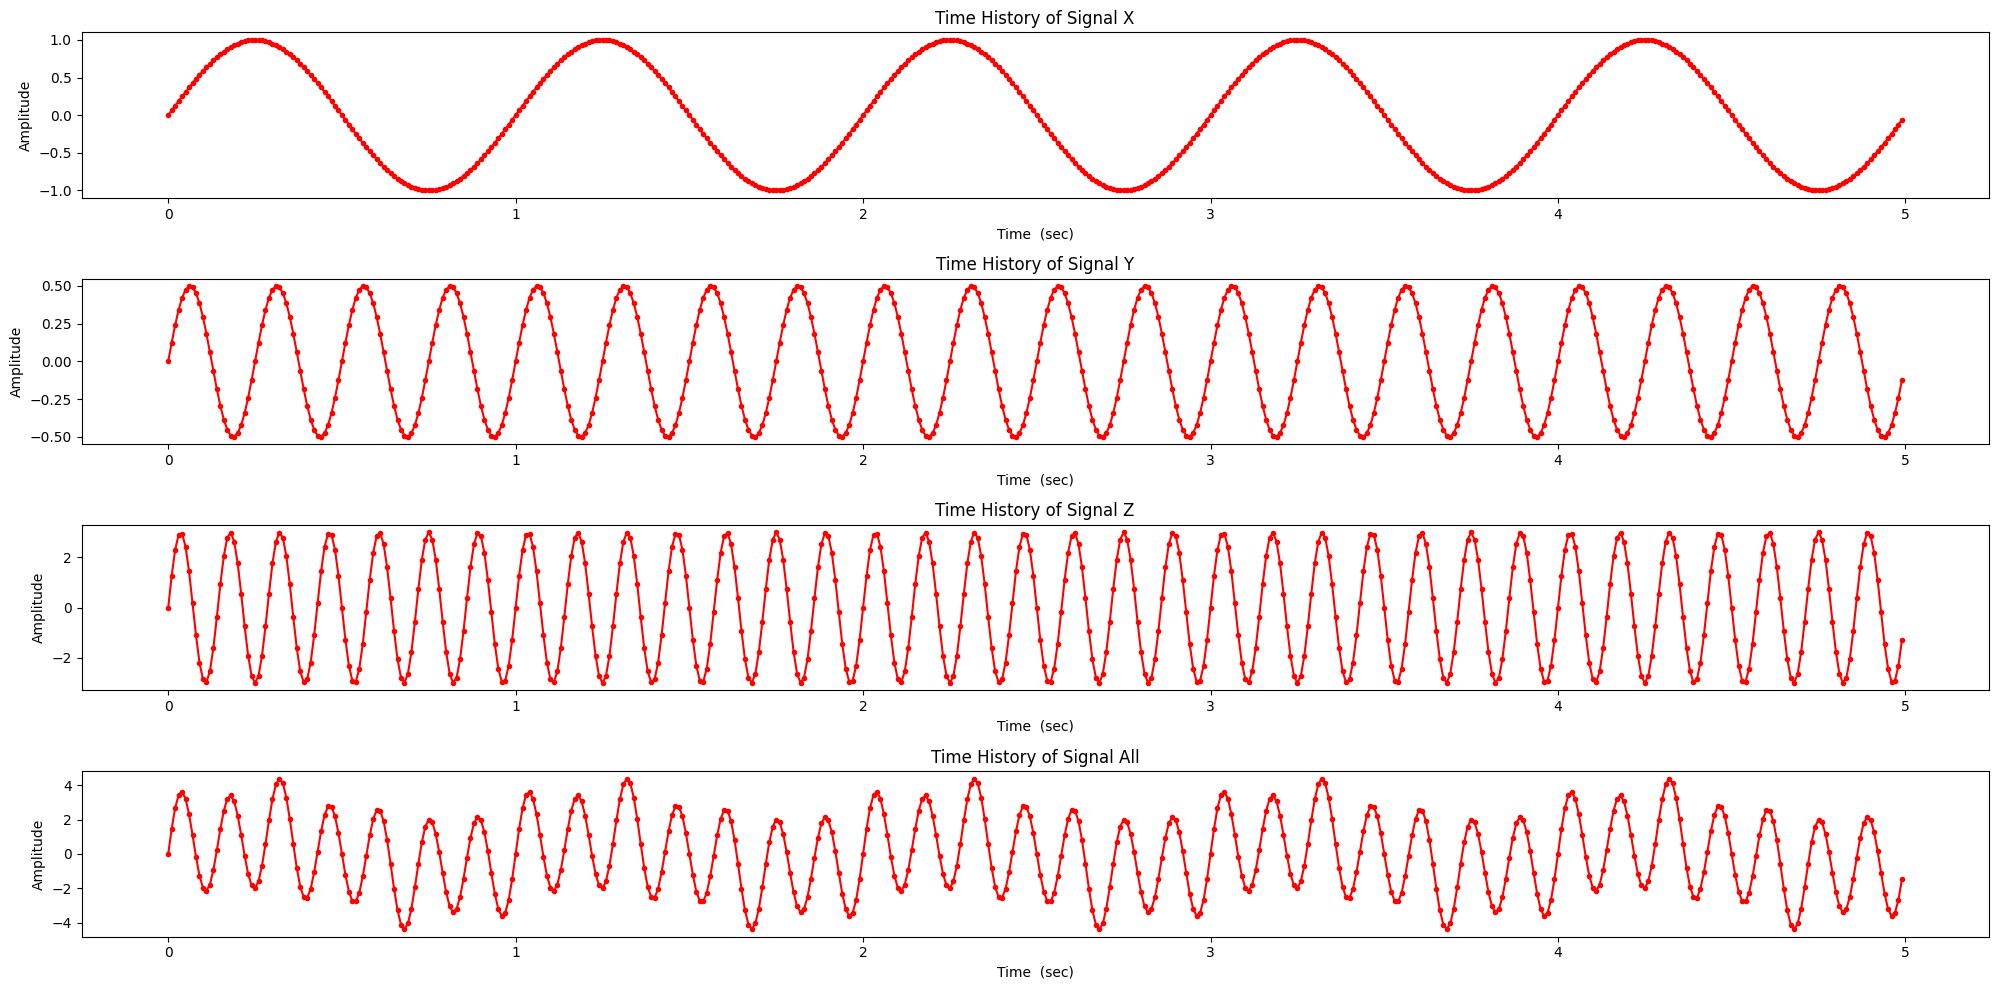

In [78]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1, figsize = (20, 10))

ax1.plot(t, x, "r.-")
ax1.set_xlabel( "Time  (sec)" )
ax1.set_ylabel( "Amplitude" )
ax1.set_title( "Time History of Signal X"  )

ax2.plot(t, y, "r.-")
ax2.set_xlabel( "Time  (sec)" )
ax2.set_ylabel( "Amplitude" )
ax2.set_title( "Time History of Signal Y" )

ax3.plot(t, z, "r.-")
ax3.set_xlabel( "Time  (sec)" )
ax3.set_ylabel( "Amplitude" )
ax3.set_title( "Time History of Signal Z" )

ax4.plot(t, wave, "r.-")
ax4.set_xlabel( "Time  (sec)" )
ax4.set_ylabel( "Amplitude" )
ax4.set_title( "Time History of Signal All" )

plt.tight_layout()
plt.show()

## **[2] Conduct FFT**

1. `N = t.size` - retrieves the total number of time entries
2. `F = fftpack.fft( wave )` - conducts FFT on the sine wave created
3. `f = fftpack.fftfreq( N, ts )` - creates the frequency bins of the FFT using the N and time interval
4. `mask = np.where( f >= 0 )` - stores the index where the frequency bins `f` are positive

In [79]:
# run FFT
N = t.size
F = fftpack.fft( wave )
f = fftpack.fftfreq( N, ts )
mask = np.where( f >= 0 )

### **[2.1] Plotting the FFT**

1. `abs(F[mask])/(N//2)` - normalizes the FFT
    * No need to multiply by two to normalized compared to `np.fft.fft` method `wave = np.fft.fft`
2. `N//2` - half the sample size

#### Plotting only the absolute value of the FFT beyond the *Nyquist limit* gives the mirror of the FFT values

250


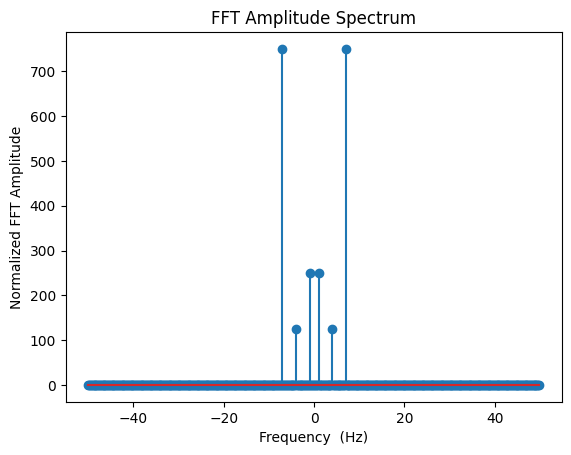

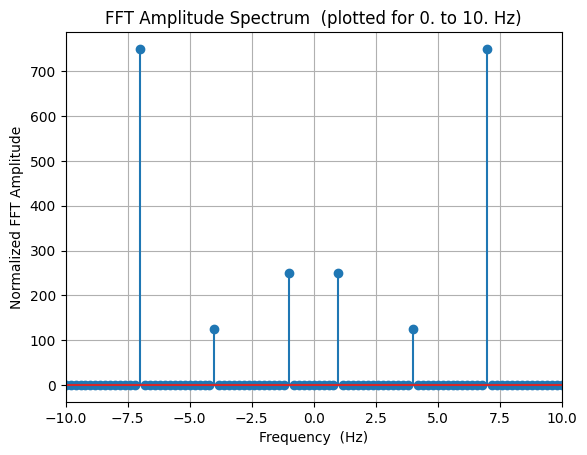

In [80]:
print(N//2)
plt.figure(2)
plt.stem( f, abs(F))
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )
plt.title( "FFT Amplitude Spectrum" )
plt.show()

plt.figure(3)
plt.stem( f, abs(F) )
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )
plt.title( "FFT Amplitude Spectrum  (plotted for 0. to 10. Hz)" )
plt.xlim(-10,10)
plt.grid()
plt.show()

### Plotting the absolute and normalized value of the FFT with the *Nyquist limit*
Apply
1. The mask (*Nyquist limit*) 
2. `N//2` - half the total number of samples

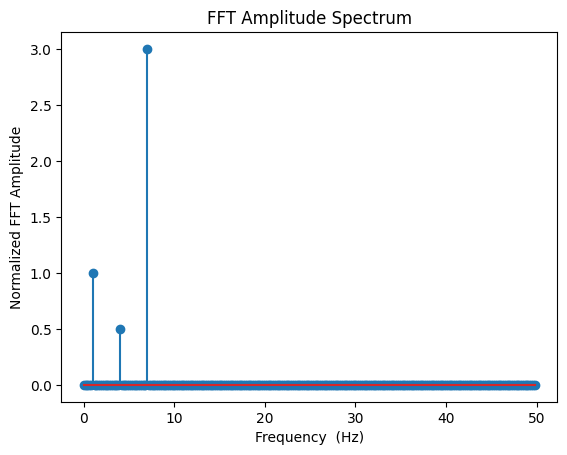

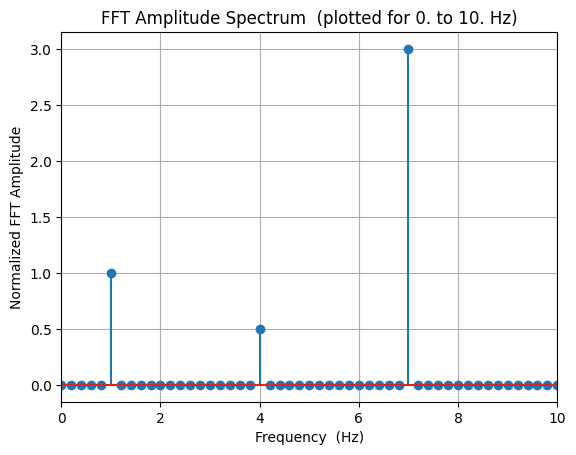

In [81]:
plt.figure(2)
plt.stem( f[mask], abs(F[mask])/(N//2) )
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )
plt.title( "FFT Amplitude Spectrum" )
plt.show()

plt.figure(3)
plt.stem( f[mask], abs(F[mask])/(N//2) )
plt.xlabel( "Frequency  (Hz)")
plt.ylabel( "Normalized FFT Amplitude" )
plt.title( "FFT Amplitude Spectrum  (plotted for 0. to 10. Hz)" )
plt.xlim(0,10.)
plt.grid()
plt.show()

# **Other details for future reference**

The 5, 20, and 35 indeces indicate the 5, 20, 35 frequency bins that the 1 Hz, 4 Hz, and 7 Hz reside

* `np.abs` = The absolute values just use the Pythagorean Theorem $\sqrt{(a^2 + b^2)}$
* `N//2` = Is the division to the nearest integer floor

In [82]:
print("FFT Values:")
print("  F[{}] = {}".format(5,F[5]))
print("  F[{}] = {}".format(20,F[20]))
print("  F[{}] = {}".format(35,F[35]))

print("\nFFT Absolute Values:")
print("  {}".format(abs(F[5])))
print("  {}".format(abs(F[20])))
print("  {}".format(abs(F[35])))

print("\nFrequency Bins:")
print("  {}".format(f[5]))
print("  {}".format(f[20]))
print("  {}".format(f[35]))

print("\nTotal number of samples (N): {}".format(N))
print("N//2: {}".format(N//2))

FFT Values:
  F[5] = (-3.7020610224112376e-13-250.00000000000034j)
  F[20] = (-3.1193514773224907e-13-124.99999999999977j)
  F[35] = (-1.3742966209354301e-12-750j)

FFT Absolute Values:
  250.00000000000034
  124.99999999999977
  750.0

Frequency Bins:
  1.0
  4.0
  7.0

Total number of samples (N): 500
N//2: 250
